In [2]:
# Add matplotlib magic command
%matplotlib inline
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
city_data = os.path.join("Resources/city_data.csv")
ride_data = os.path.join("Resources/ride_data.csv")
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
#Count rows
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
#Check null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Check for duplicates
city_df.duplicated().sum()

0

In [8]:
#Make sure driver_count data is int for calculations
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get the unique values of the type of city.
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_df["type"]=="Urban")

66

In [11]:
#Check the second files rows
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_df.duplicated().sum()

0

In [14]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
#Merge the files
pyber_df = pd.merge(ride_df, city_df,how="left", on=["city","city"])

In [16]:
# Create dataframe for each city type.
urban_df = pyber_df[pyber_df["type"] == "Urban"]

In [17]:
rural_df = pyber_df[pyber_df["type"] == "Rural"]

In [18]:
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]

In [19]:
#Group by city and count the number of rides per city per type
urban_city_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_city_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [20]:
rural_city_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_city_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
suburban_city_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_city_count


city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [22]:
type_count = pyber_df.groupby(["type"]).count()["ride_id"]
type_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [23]:
# Get average fare for each city in the suburban and rural cities.
average_urban = urban_df.groupby(["city"]).mean()["fare"]

In [24]:
average_rural = rural_df.groupby(["city"]).mean()["fare"]

In [25]:
average_suburban = suburban_df.groupby(["city"]).mean()["fare"]

In [26]:
urban_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
urban_drivers.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
rural_drivers = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]

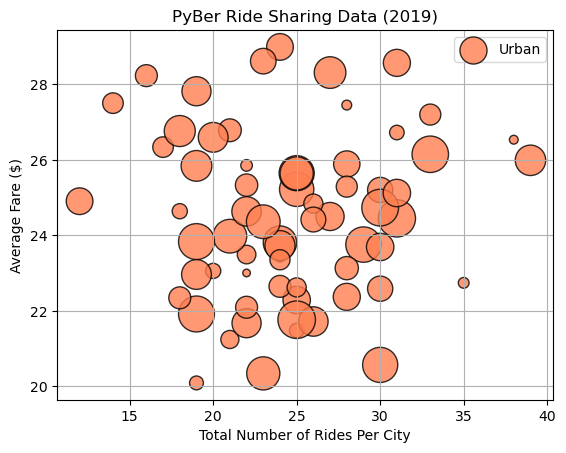

In [28]:
plt.scatter(urban_city_count,average_urban,s=10*urban_drivers, 
            linewidths=1,edgecolor="k",c="coral",
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()
plt.show()

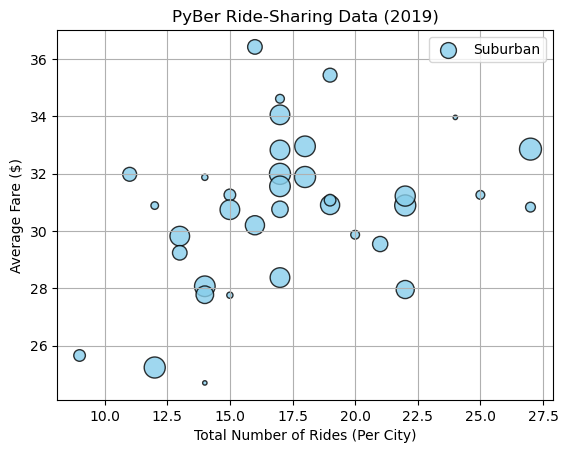

In [29]:
plt.scatter(suburban_city_count,average_suburban,
            s=10*suburban_drivers, linewidths=1,
           edgecolor = "k", c="skyblue", alpha = 0.8, 
            label = "Suburban" )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

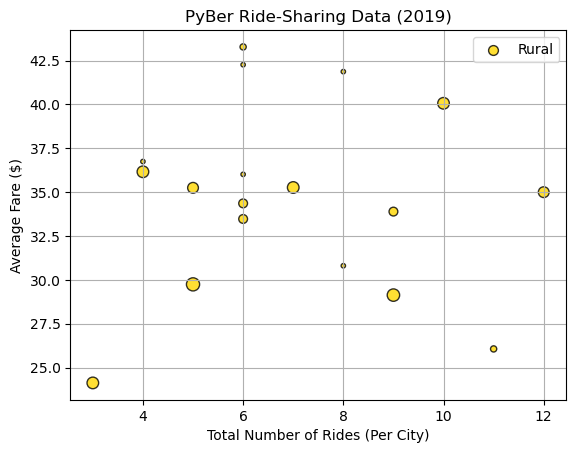

In [30]:
plt.scatter(rural_city_count, average_rural, 
            s=10*rural_drivers, label="Rural",
           edgecolor = "k", c="gold", linewidths=1, 
            alpha = 0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

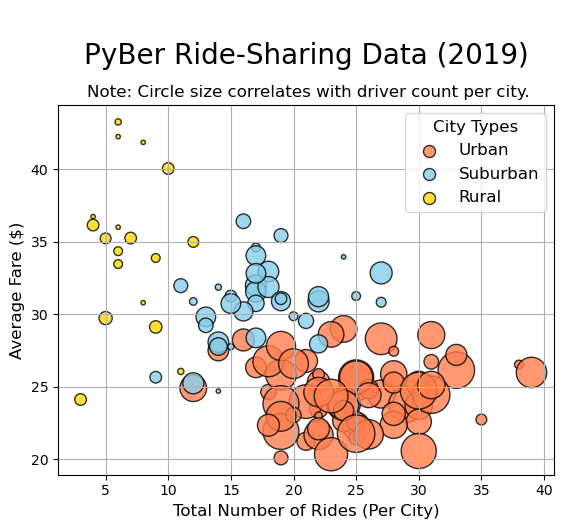

In [31]:
# Add the scatter charts for each type of city.
plt.scatter(urban_city_count,average_urban,s=10*urban_drivers, 
            linewidths=1,edgecolor="k",c="coral",
           alpha = 0.8, label = "Urban")

plt.scatter(suburban_city_count,average_suburban,
            s=10*suburban_drivers, linewidths=1,
           edgecolor = "k", c="skyblue", alpha = 0.8, 
            label = "Suburban" )

plt.scatter(rural_city_count, average_rural, 
            s=10*rural_drivers, label="Rural",
           edgecolor = "k", c="gold", linewidths=1, 
            alpha = 0.8)

# Incorporate the other graph properties
plt.title("\nPyBer Ride-Sharing Data (2019)\n", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(3.5, 45, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Show the plot
plt.savefig("analysis/PyBer.png")
plt.show()


In [32]:
urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
rural_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [34]:
suburban_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
urban_city_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_city_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_city_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [38]:
# Calculate the mean of the ride count for each city type.
round(urban_city_count.mean(),2), round(suburban_city_count.mean(),2), round(rural_city_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
round(urban_city_count.median(),2), round(suburban_city_count.median(),2), round(rural_city_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
urban_city_count.mode(), suburban_city_count.mode(), rural_city_count.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [41]:
#import NumPy and SciPy
import numpy as np
import scipy.stats as sts

mean_urban_ride_count = np.mean(urban_city_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_city_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_city_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}\n")


mean_suburban_ride_count = np.mean(suburban_city_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_city_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_city_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}\n")

mean_rural_ride_count = np.mean(rural_city_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_city_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_city_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7]))

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7]))

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [42]:
# Get the fares for the urban cities.
urban_fares = urban_df["fare"]
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [43]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean of urban fares is: {mean_urban_fares:.2f}.")
median_urban_fares = np.median(urban_fares)
print(f"The median of urban fares: {median_urban_fares:.2f}.")
mode_urban_fares = sts.mode(urban_fares)
print(f"The mode of urban fares: {mode_urban_fares}\n\n")

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean of suburban fares: {mean_suburban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
print(f"The median of suburban fares: {median_suburban_fares:.2f}.")
mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode of suburban fares: {mode_suburban_fares}\n\n")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean of rural fares: {mean_rural_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
print(f"The median of rural fares: {median_rural_fares:.2f}.")
mode_rural_fares = sts.mode(rural_fares)
print(f"The mode of rural fares: {mode_rural_fares}\n")



The mean of urban fares is: 24.53.
The median of urban fares: 24.64.
The mode of urban fares: ModeResult(mode=array([22.86]), count=array([5]))


The mean of suburban fares: 30.97.
The median of suburban fares: 30.75.
The mode of suburban fares: ModeResult(mode=array([17.99]), count=array([3]))


The mean of rural fares: 34.62.
The median of rural fares: 37.05.
The mode of rural fares: ModeResult(mode=array([37.05]), count=array([2]))



In [44]:
# Get the driver count data from the urban cities.
urban_drivers = urban_df['driver_count']
suburban_drivers = suburban_df['driver_count']
rural_drivers = rural_df['driver_count']

In [45]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The average(mean) number of drivers in urban areas: {mean_urban_drivers:.0f}.")
median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban areas: {median_urban_drivers:.0f}.")
mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode of urban drivers is: {mode_urban_drivers}.\n\n')

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The average(mean) number of drivers in suburban areas: {mean_suburban_drivers:.0f}.")
median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in suburban areas: {median_suburban_drivers:.0f}.")
mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'The mode of suburban drivers is: {mode_suburban_drivers}.\n\n')

mean_rural_drivers = np.mean(rural_drivers)
print(f"The average(mean) number of drivers in rural areas: {mean_rural_drivers:.0f}.")
median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural areas: {median_rural_drivers:.0f}.")
mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode of rural drivers is: {mode_rural_drivers}.\n\n')



The average(mean) number of drivers in urban areas: 37.
The median number of drivers in urban areas: 37.
The mode of urban drivers is: ModeResult(mode=array([39]), count=array([86])).


The average(mean) number of drivers in suburban areas: 14.
The median number of drivers in suburban areas: 16.
The mode of suburban drivers is: ModeResult(mode=array([20]), count=array([79])).


The average(mean) number of drivers in rural areas: 4.
The median number of drivers in rural areas: 4.
The mode of rural drivers is: ModeResult(mode=array([1]), count=array([32])).




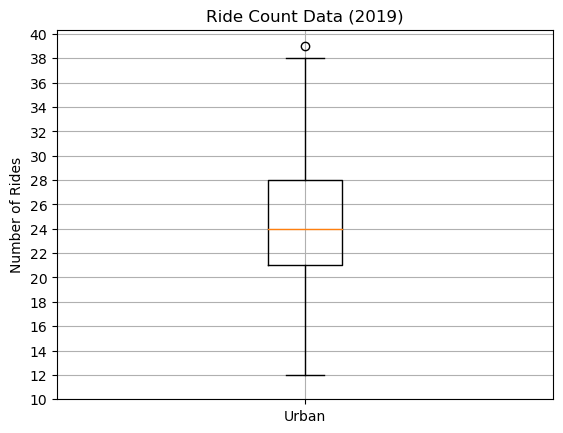

In [46]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_city_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

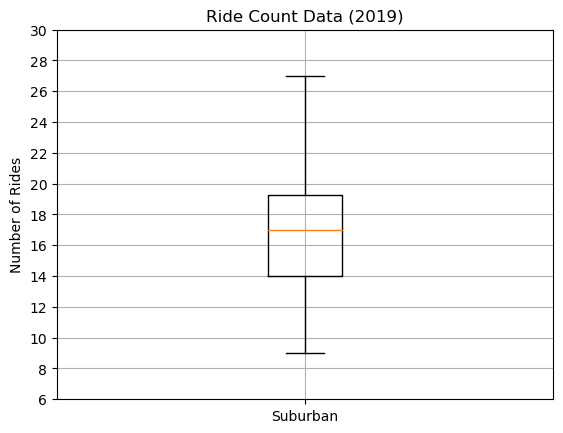

In [47]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_city_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(6, 32, step=2.0))
ax.grid()
plt.show()

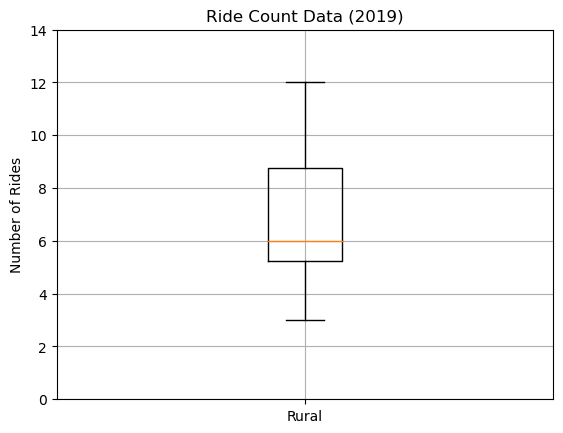

In [48]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_city_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 16, step=2.0))
ax.grid()
plt.show()

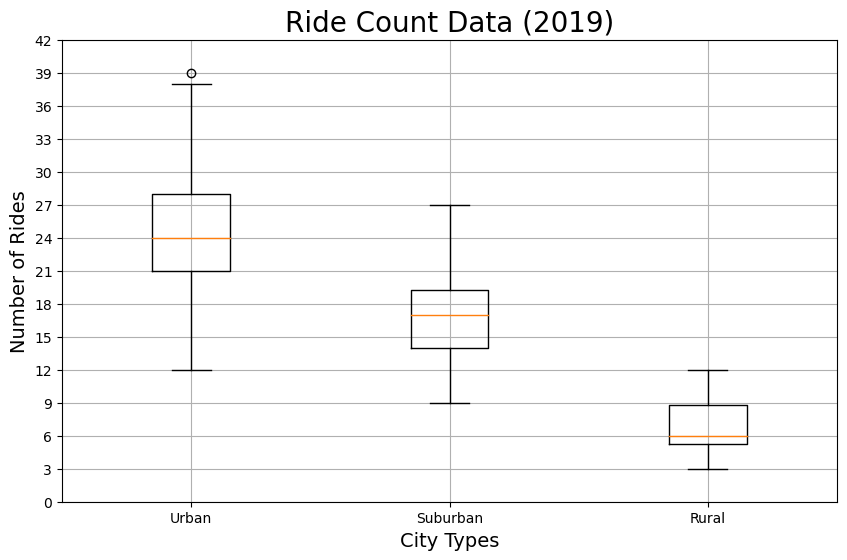

In [49]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_city_count, suburban_city_count, rural_city_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/BoxandWhisker.png")
plt.show()

In [50]:
#Get the highest number of rides from urban cities
urban_outliers = urban_city_count[urban_city_count==39].index[0]
print(f"{urban_outliers} has the highest rider count.")

West Angela has the highest rider count.


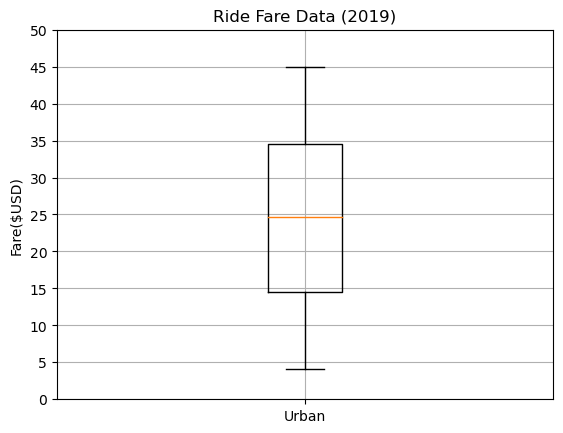

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [51]:
# Create a box-and-whisker plot for the urban fare data.
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()


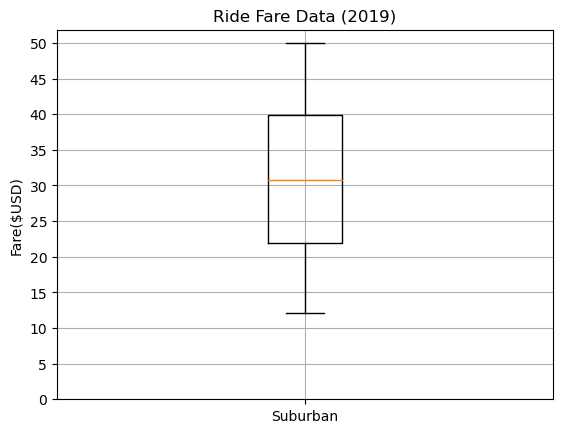

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [52]:
#Create summary stats for rural and suburban city fares
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

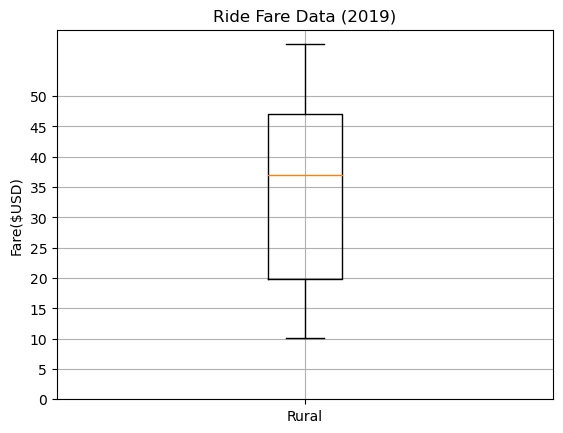

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [53]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

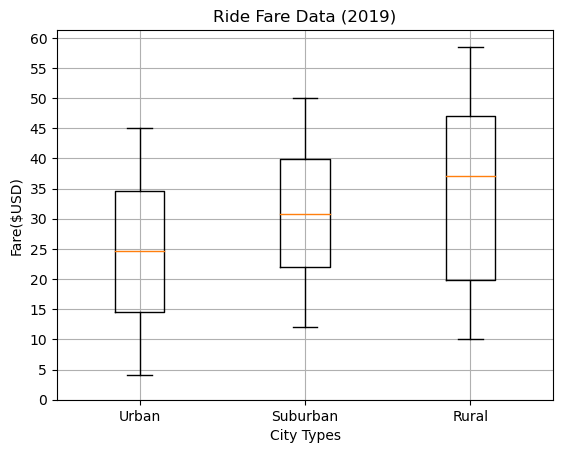

In [54]:
x_labels = ["Urban", "Suburban", "Rural"]
fig,ax = plt.subplots()
fare_data = [urban_fares, suburban_fares, rural_fares]
ax.boxplot(fare_data, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
ax.set_xlabel("City Types")
plt.show()

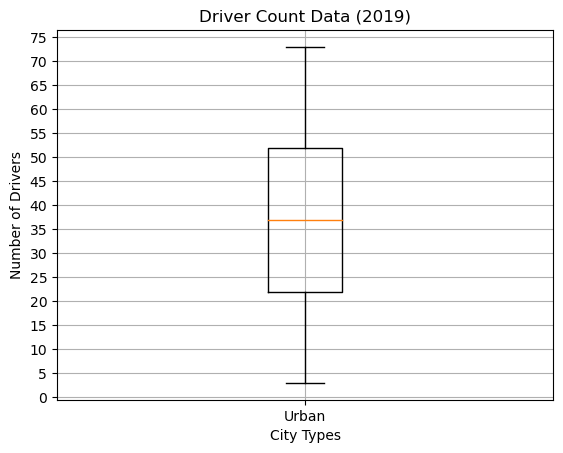

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [55]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_xlabel("City Types")
ax.grid(True)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 80, step=5.0))
plt.show()
print("Summary Statistics")
urban_drivers.describe()

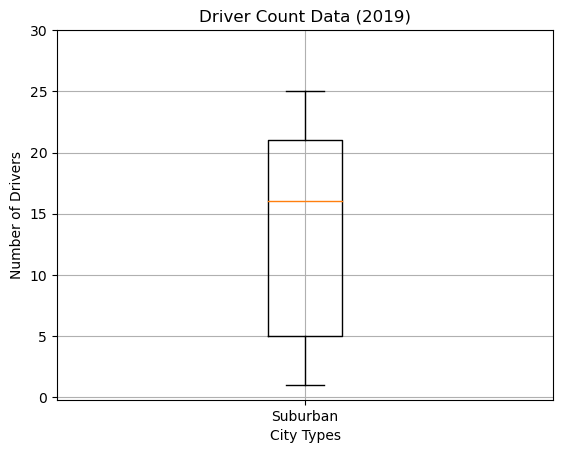

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [56]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_xlabel("City Types")
ax.grid(True)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 35, step=5.0))
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

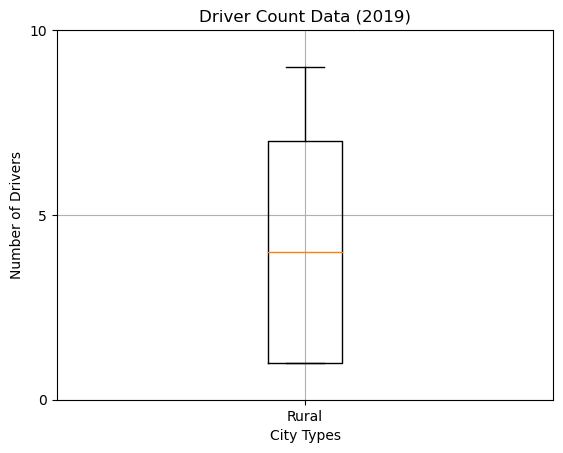

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [57]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_xlabel("City Types")
ax.grid(True)
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 15, step=5.0))
plt.show()
print("Summary Statistics")
rural_drivers.describe()

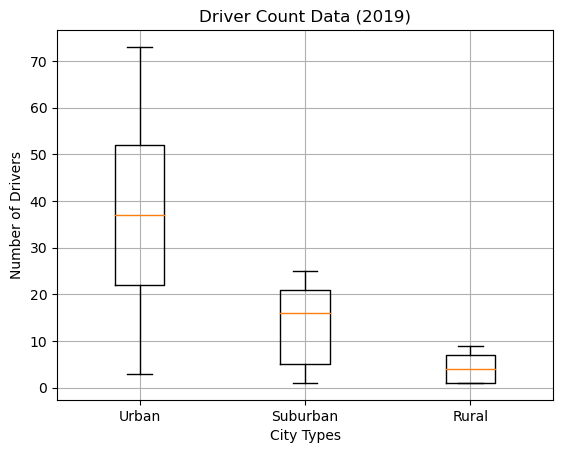

In [58]:
x_labels = ["Urban", "Suburban", "Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig,ax = plt.subplots()
ax.boxplot(driver_data, labels = x_labels)
ax.set_title("Driver Count Data (2019)")
ax.set_xlabel("City Types")
ax.set_ylabel("Number of Drivers")
ax.grid(True)

In [59]:
#get the sum of the fares for each city type
city_fares = pyber_df.groupby("type").sum()["fare"]
city_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [60]:
#get the sum of all the fares
total_fares = pyber_df["fare"].sum()
total_fares

63538.64

In [61]:
type_percent = (city_fares / total_fares * 100)
type_percent

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

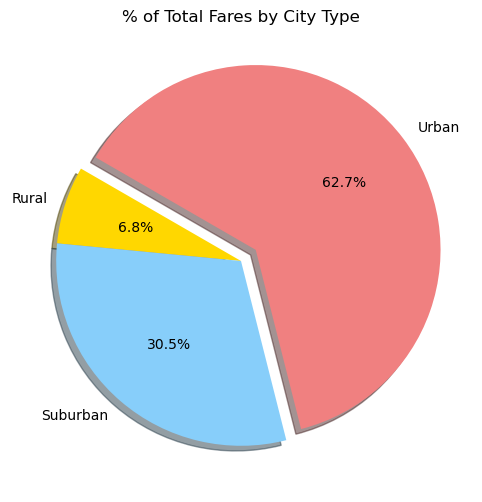

In [62]:
import matplotlib as mpl
plt.subplots(figsize=(10, 6))
plt.pie(type_percent,labels=["Rural", "Suburban", "Urban"],
       colors = ["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
#Save figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [64]:
ride_percent = 100 * (pyber_df.groupby("type").sum()["ride_id"]/sum(pyber_df["ride_id"]))
ride_percent

type
Rural        5.005212
Suburban    26.766722
Urban       68.228066
Name: ride_id, dtype: float64

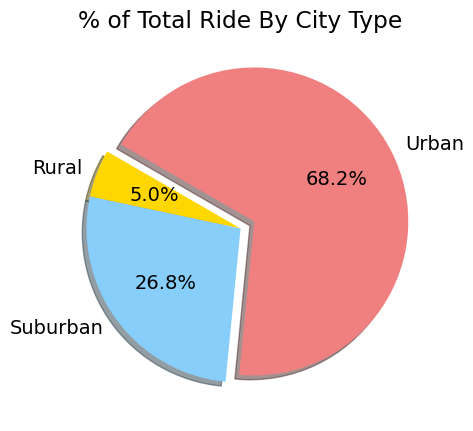

In [68]:
import matplotlib as mpl
plt.subplots(figsize=(10,5))
plt.pie(ride_percent, labels=["Rural","Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1], shadow = True, autopct='%1.1f%%', startangle = 150
       )
plt.title("% of Total Ride By City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
#Save figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()